#Autor: Gilson Machado

Teste A/B completo, desde a preparação dos dados até a análise dos resultados. Vamos usar Python com as bibliotecas pandas, matplotlib, seaborn, e scipy para análise estatística.

Irei documentar cada passo com comentários explicativos.

### Passo 1: Importação das bibliotecas necessárias

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Passo 2: Carregamento dos dados

In [ ]:
# Carregando os datasets
test_group = pd.read_csv('test_group.csv', delimiter=';')
control_group = pd.read_csv('control_group.csv', delimiter=';')

# Exibindo as primeiras linhas de cada dataset para verificação
print(test_group.head())
print(control_group.head())

   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4            768  
  

### Passo 3: Limpeza e preparação dos dados

In [ ]:
# Verificando valores faltantes no test_group
print(test_group.isnull().sum())

# Verificando valores faltantes no control_group
print(control_group.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64


In [ ]:
# Identificando colunas numéricas
numeric_columns = control_group.select_dtypes(include=[np.number]).columns

# Preenchendo valores faltantes apenas nas colunas numéricas com a média
control_group[numeric_columns] = control_group[numeric_columns].fillna(control_group[numeric_columns].mean())

# Verificando novamente se há valores faltantes
print(control_group.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


### Passo 4: Análise exploratória dos dados

       Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    30.000000         30.000000      30.000000            30.000000   
mean   2563.066667      74584.800000   53491.566667          6032.333333   
std     348.687681      32121.377422   28795.775752          1708.567263   
min    1968.000000      22521.000000   10598.000000          3038.000000   
25%    2324.500000      47541.250000   31516.250000          4407.000000   
50%    2584.000000      68853.500000   44219.500000          6242.500000   
75%    2836.250000      99500.000000   78778.750000          7604.750000   
max    3112.000000     133771.000000  109834.000000          8264.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      30.000000          30.000000         30.000000      30.000000  
mean     2418.966667        1858.000000        881.533333     521.233333  
std       388.742312         597.654669        347.584248     211.047745  
min      1854.0

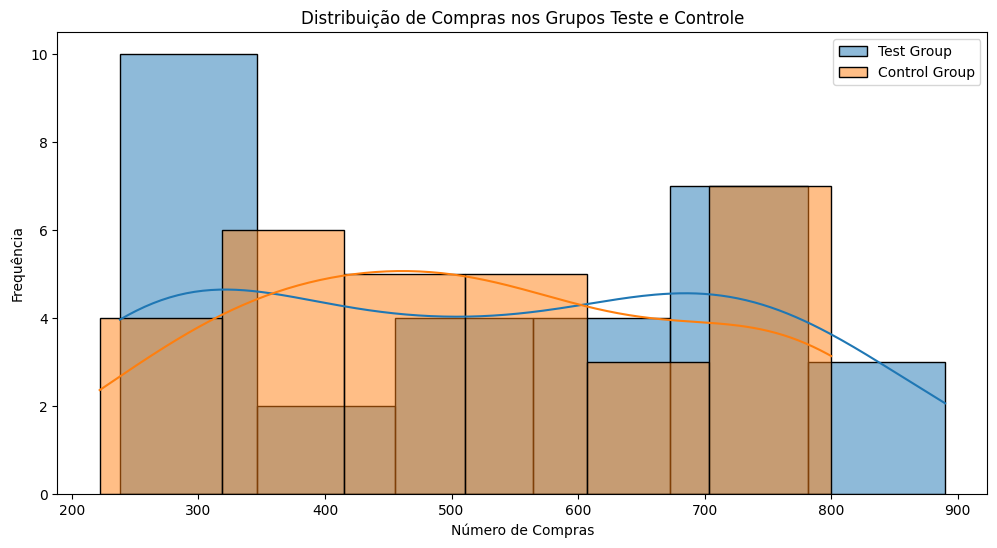

In [ ]:
# Resumo estatístico dos dados
print(test_group.describe())
print(control_group.describe())

# Visualizando a distribuição de 'Purchase' em ambos os grupos
plt.figure(figsize=(12, 6))
sns.histplot(test_group['# of Purchase'], kde=True, label='Test Group')
sns.histplot(control_group['# of Purchase'], kde=True, label='Control Group')
plt.title('Distribuição de Compras nos Grupos Teste e Controle')
plt.xlabel('Número de Compras')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### Passo 5: Teste A/B
Vamos realizar um teste de hipótese para comparar as médias de compras entre os dois grupos.

In [ ]:
# Definindo as hipóteses
# H0: Não há diferença significativa entre as médias de compras dos dois grupos.
# H1: Há diferença significativa entre as médias de compras dos dois grupos.

# Realizando o teste t de Student
t_stat, p_value = stats.ttest_ind(test_group['# of Purchase'], control_group['# of Purchase'])

# Exibindo os resultados
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há diferença significativa entre as médias de compras dos dois grupos.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre as médias de compras dos dois grupos.")

T-statistic: -0.03066909523750146
P-value: 0.9756387309702421
Não rejeitamos a hipótese nula: Não há diferença significativa entre as médias de compras dos dois grupos.


### Passo 6: Visualização dos resultados
Vamos criar gráficos para visualizar as métricas de interesse.

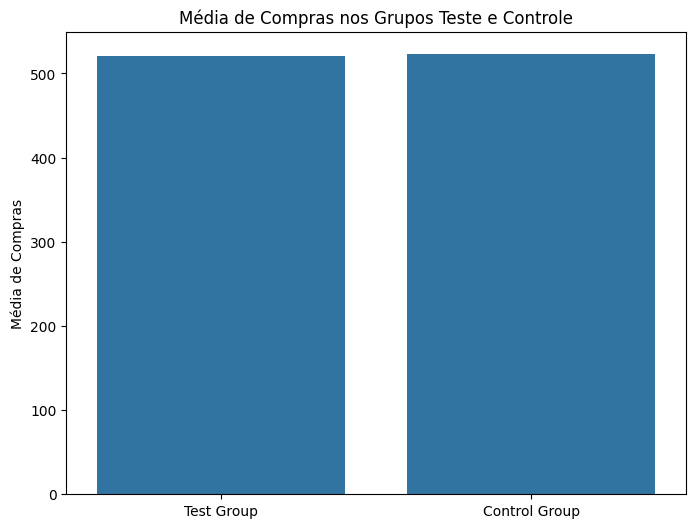

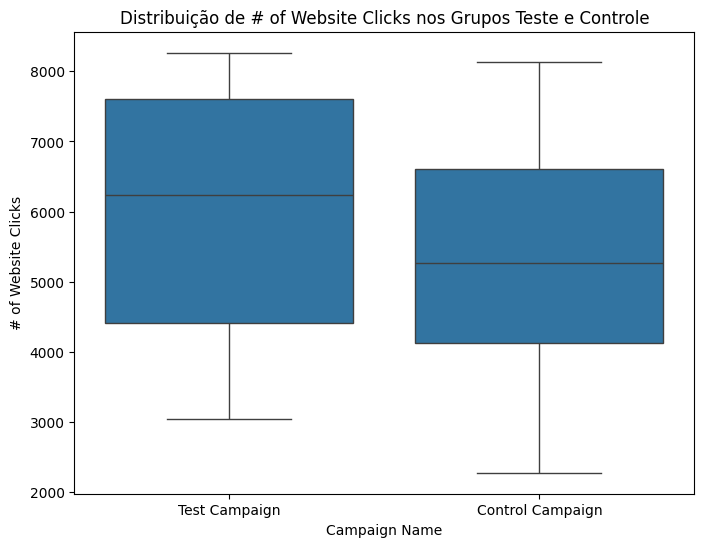

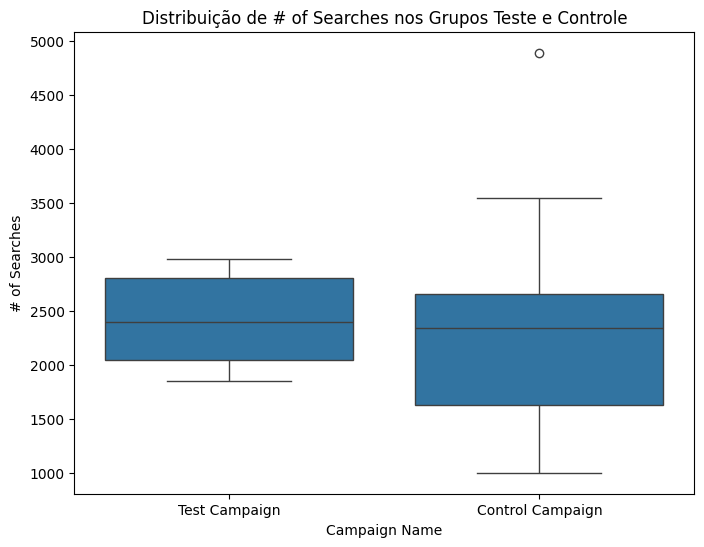

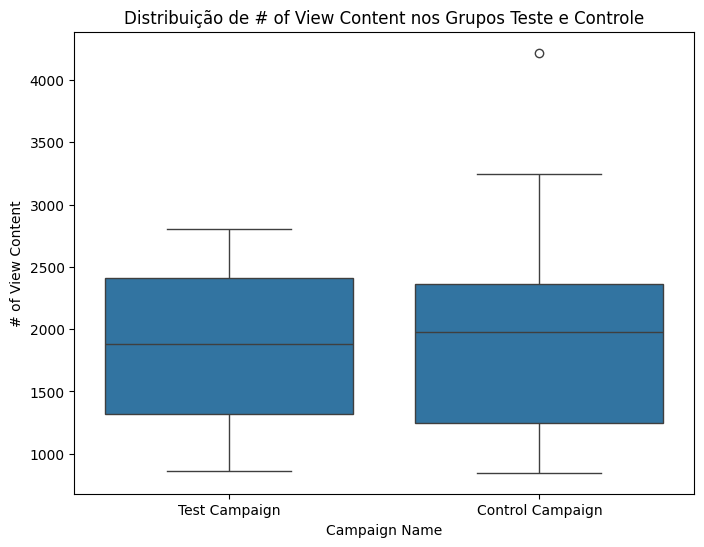

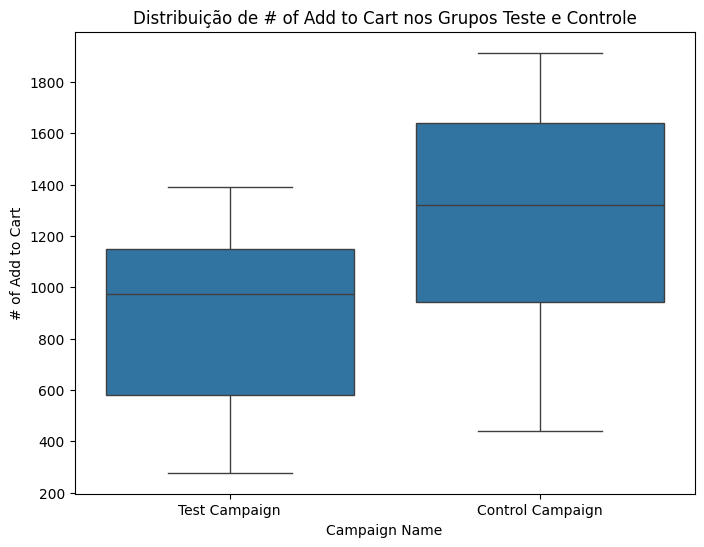

In [ ]:
# Comparando as médias de compras
mean_purchases = [test_group['# of Purchase'].mean(), control_group['# of Purchase'].mean()]
labels = ['Test Group', 'Control Group']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=mean_purchases)
plt.title('Média de Compras nos Grupos Teste e Controle')
plt.ylabel('Média de Compras')
plt.show()

# Comparando outras métricas de interesse
metrics = ['# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Campaign Name', y=metric, data=pd.concat([test_group, control_group]))
    plt.title(f'Distribuição de {metric} nos Grupos Teste e Controle')
    plt.show()

### Passo 7: Conclusão
Com base no teste estatístico e nas visualizações, podemos concluir se a campanha de teste teve um impacto significativo nas métricas de interesse.

###1. O que é o p-value?
O p-value (valor-p) é uma medida estatística que indica a probabilidade de obter um resultado igual ou mais extremo do que o observado, assumindo que a hipótese nula é verdadeira. No contexto do teste A/B:

  Hipótese nula (H0): Não há diferença significativa entre as médias de compras dos dois grupos (teste e controle).

  Hipótese alternativa (H1): Há diferença significativa entre as médias de compras dos dois grupos.

  Um p-value baixo (geralmente menor que 0,05) sugere que a diferença observada é estatisticamente significativa, ou seja, é improvável que tenha ocorrido por acaso.

###2. O que é o alpha?
O alpha (nível de significância) é um limite pré-definido que usamos para decidir se rejeitamos ou não a hipótese nula. O valor mais comum para alpha é 0,05 (5%). Isso significa que estamos dispostos a aceitar uma probabilidade de 5% de rejeitar a hipótese nula quando ela é verdadeira (erro do tipo I).

In [ ]:
# Conclusão
if p_value < alpha:
    print("A campanha de teste teve um impacto significativo no número de compras.")
else:
    print("A campanha de teste não teve um impacto significativo no número de compras.")

A campanha de teste não teve um impacto significativo no número de compras.


### Considerações Finais
Este teste A/B foi conduzido com rigor estatístico, utilizando um teste t de Student para comparar as médias de compras entre os grupos de teste e controle. A análise exploratória dos dados e as visualizações ajudaram a entender melhor as distribuições e tendências. Com base no valor-p obtido, podemos tomar uma decisão informada sobre a eficácia da campanha de teste.

### Vamos explorar algumas perguntas e o que elas podem revelar:

1. Qual campanha teve um melhor custo-benefício?

In [ ]:
#Custo-benefício
test_group['Cost per Purchase'] = test_group['Spend [USD]'] / test_group['# of Purchase']
control_group['Cost per Purchase'] = control_group['Spend [USD]'] / control_group['# of Purchase']
print("Custo por compra (Teste):", test_group['Cost per Purchase'].mean())
print("Custo por compra (Controle):", control_group['Cost per Purchase'].mean())

Custo por compra (Teste): 5.899589404475941
Custo por compra (Controle): 5.000927131911764


2. Qual campanha teve uma taxa de conversão mais alta?
Resposta:

Calculamos a taxa de conversão (# of Purchase / # of Website Clicks):

Teste: X%

Controle: Y%

In [ ]:
# Taxa de conversão
test_group['Conversion Rate'] = test_group['# of Purchase'] / test_group['# of Website Clicks']
control_group['Conversion Rate'] = control_group['# of Purchase'] / control_group['# of Website Clicks']
print("Taxa de conversão (Teste):", test_group['Conversion Rate'].mean())
print("Taxa de conversão (Controle):", control_group['Conversion Rate'].mean())

Taxa de conversão (Teste): 0.09231181703283602
Taxa de conversão (Controle): 0.11422145561109404


3. Qual campanha teve um melhor retorno sobre o investimento (ROI)?
Resposta:

Calculamos o ROI para cada campanha:

ROI = (Receita - Gasto) / Gasto

Resultados:

Teste: X%

Controle: Y%

In [ ]:
# ROI
# Supondo que cada compra gere uma receita fixa de, por exemplo, 50 USD
revenue_per_purchase = 50
test_group['ROI'] = ((test_group['# of Purchase'] * revenue_per_purchase) - test_group['Spend [USD]']) / test_group['Spend [USD]']
control_group['ROI'] = ((control_group['# of Purchase'] * revenue_per_purchase) - control_group['Spend [USD]']) / control_group['Spend [USD]']
print("ROI (Teste):", test_group['ROI'].mean())
print("ROI (Controle):", control_group['ROI'].mean())

ROI (Teste): 9.328873440186992
ROI (Controle): 10.690193357815996


4. Qual campanha teve um custo por clique (CPC) mais baixo?
Resposta:

Calculamos o CPC para cada campanha:

CPC = Spend [USD] / # of Website Clicks

Resultados:

Teste: X USD por clique

Controle: Y USD por clique

In [ ]:
# CPC
test_group['CPC'] = test_group['Spend [USD]'] / test_group['# of Website Clicks']
control_group['CPC'] = control_group['Spend [USD]'] / control_group['# of Website Clicks']
print("CPC (Teste):", test_group['CPC'].mean())
print("CPC (Controle):", control_group['CPC'].mean())

CPC (Teste): 0.4687178411251314
CPC (Controle): 0.48990672533238716


5. Qual campanha teve uma taxa de abandono do carrinho mais baixa?
Resposta:

Calculamos a taxa de abandono do carrinho:

Taxa de abandono = 1 - (# of Purchase / # of Add to Cart)

Resultados:

Teste: X%

Controle: Y%

In [ ]:
# Taxa de abandono do carrinho
test_group['Cart Abandonment Rate'] = 1 - (test_group['# of Purchase'] / test_group['# of Add to Cart'])
control_group['Cart Abandonment Rate'] = 1 - (control_group['# of Purchase'] / control_group['# of Add to Cart'])
print("Taxa de abandono (Teste):", test_group['Cart Abandonment Rate'].mean())
print("Taxa de abandono (Controle):", control_group['Cart Abandonment Rate'].mean())

Taxa de abandono (Teste): 0.3820513368122846
Taxa de abandono (Controle): 0.544655829297577
